[*********************100%***********************]  1 of 1 completed


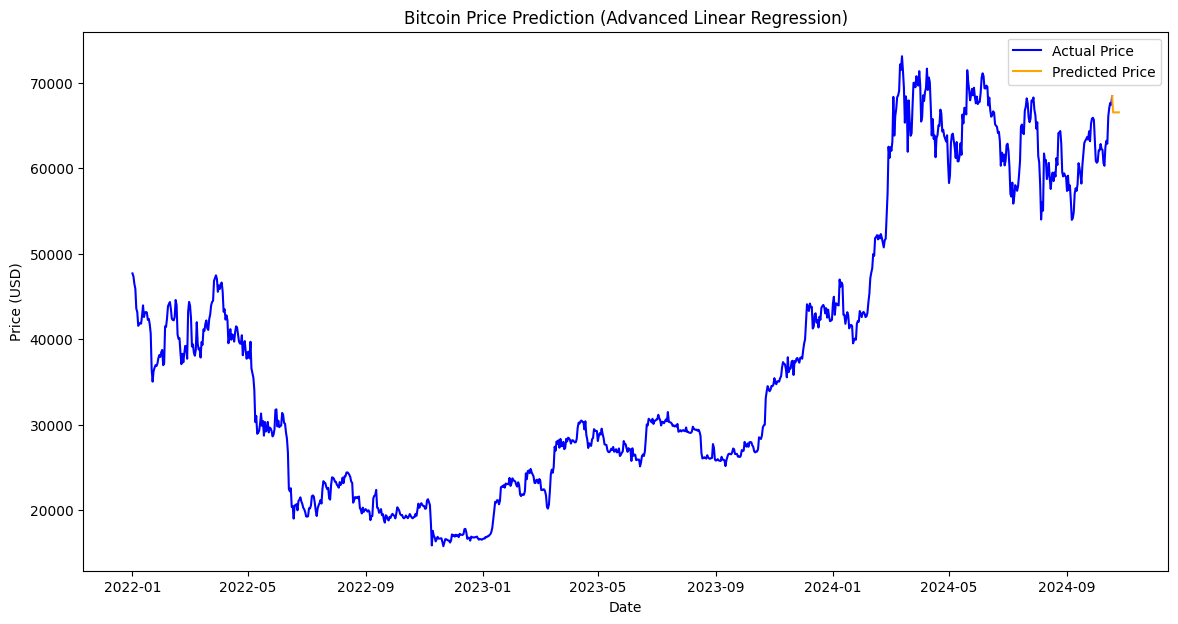

        Date  Predicted Price
0 2024-10-18     68418.789062
1 2024-10-19     66514.698686
2 2024-10-20     66515.509892
3 2024-10-21     66516.321099
4 2024-10-22     66517.132306
5 2024-10-23     66517.943513
6 2024-10-24     66518.754720
7 2024-10-25     66519.565926
Last Actual Closing Price: 68418.7890625 USD, Date: 2024-10-18


In [1]:
import yfinance as yf  # Import the yfinance library
import pandas as pd  # Import the pandas library
import numpy as np  # Import the NumPy library
from sklearn.linear_model import LinearRegression  # Import LinearRegression
import matplotlib.pyplot as plt  # Import matplotlib
from datetime import datetime  # Import datetime

# Get today's date in 'YYYY-MM-DD' format
today = datetime.now().strftime('%Y-%m-%d')

# Download Bitcoin data from Yahoo Finance
btc_data = yf.download('BTC-USD', start='2022-01-01', end=today)  # Get Bitcoin data from January 1, 2022, to today
btc_data['Date'] = btc_data.index  # Fill the 'Date' column with dates

# Add additional features: Moving Averages (MA)
btc_data['MA_7'] = btc_data['Close'].rolling(window=7).mean()  # 7-day moving average
btc_data['MA_30'] = btc_data['Close'].rolling(window=30).mean()  # 30-day moving average

# Backfill NaN values
btc_data.bfill(inplace=True)  # Backfill NaN values

# Convert dates to a numerical representation (number of days since the start date)
btc_data['Days'] = (btc_data['Date'] - btc_data['Date'].min()).dt.days  # Calculate days since the first date

# Define features (X) and target variable (y)
X = btc_data[['Days', 'MA_7', 'MA_30']]  # Select 'Days', 'MA_7', and 'MA_30' as features
y = btc_data['Close']  # Select 'Close' price as the target variable

# Create the linear regression model
model = LinearRegression()  # Initialize the LinearRegression model
model.fit(X, y)  # Fit the model with the data

# Get the numerical representation of the last day
last_day = btc_data['Days'].max()  # Get the highest day count in the dataset

# Prepare to make predictions for the next 7 days
future_days = np.array(range(last_day + 1, last_day + 8)).reshape(-1, 1)  # Create an array for the next 7 days
future_ma_7 = np.repeat(btc_data['MA_7'].iloc[-1], 7).reshape(-1, 1)  # Repeat the last 7-day MA value
future_ma_30 = np.repeat(btc_data['MA_30'].iloc[-1], 7).reshape(-1, 1)  # Repeat the last 30-day MA value

# Combine future features into a DataFrame
future_features = pd.DataFrame({
    'Days': future_days.flatten(),
    'MA_7': future_ma_7.flatten(),
    'MA_30': future_ma_30.flatten()
})

# Make predictions with the model
predictions = model.predict(future_features)  # Predict future prices based on features

# Get the last actual closing price and date
last_close = btc_data['Close'].iloc[-1]  # Get the last closing price from the dataset
last_date = btc_data['Date'].iloc[-1]  # Get the last date from the dataset

# Create dates for the predictions
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)  # Create dates for the next 7 days

# Add the last actual closing price to the predictions list
predictions_with_last_close = [last_close] + list(predictions)  # Combine the last closing price with predictions
future_dates_with_last_close = pd.date_range(start=last_date, periods=8)  # Create dates including the last date

# Visualize the results
plt.figure(figsize=(14, 7))  # Set the figure size
plt.plot(btc_data['Date'], y, label='Actual Price', color='blue')  # Plot actual prices in blue
plt.plot(future_dates_with_last_close, predictions_with_last_close, label='Predicted Price', color='orange')  # Plot predicted prices in orange
plt.title('Bitcoin Price Prediction (Advanced Linear Regression)')  # Set the title of the plot
plt.xlabel('Date')  # Label for the X-axis
plt.ylabel('Price (USD)')  # Label for the Y-axis
plt.legend()  # Show the legend
plt.show()  # Display the plot

# Print the predicted prices as a DataFrame
predicted_prices = pd.DataFrame({'Date': future_dates_with_last_close, 'Predicted Price': predictions_with_last_close})  # Create a DataFrame for predicted prices
print(predicted_prices)  # Display predicted prices

# Print the last actual closing price and date
print(f"Last Actual Closing Price: {last_close} USD, Date: {last_date.date()}")
